In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import networkx as nx
import math
import random

from NetworkResilience import *

C:\Users\KING MSI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
# load dataset1
df_node1 = pd.read_csv('df_pos_with_state_clean2.csv')
df_node1 =  df_node1[['node', 'lat', 'lon', 'city_num','state_num']]
df_edge1 = pd.read_csv('clean_data_no_latlon.csv')
node_cluster1 = pd.read_csv('df_pos_cluster.csv')
edge_cluster1 = pd.read_csv('df_edge_cluster.csv')

# load dataset2
df_node2 = pd.read_csv('dataset2_df_nodes_v3.csv')
df_node2 =  df_node2[['node_id', 'lat', 'lon', 'type_num']]
df_edge2 = pd.read_csv('dataset2_df_edges_v3.csv')
node_cluster2 = pd.read_csv('dataset2_df_node_cluster.csv')
edge_cluster2 = pd.read_csv('dataset2_df_edge_cluster.csv')

- number of node (done)
- number of edge (done)
- node feature list
- edge feature list
- Density
- Avg path length
- longest shortest path length (diameter)
- Degree distribution (done)
- CC average
- power fit
- poision fit

In [55]:
print('node featuer: ','node', 'lat', 'lon', 'city_num','state_num')
print('edge featuer: ','distance', 'train_max_speed', 'arr_time', 'dep_time', 'next_arr_time', 'stay_time', 'travel_time')

node featuer:  node lat lon city_num state_num
edge featuer:  distance train_max_speed arr_time dep_time next_arr_time stay_time travel_time


In [51]:
# Create Graph
G1 = nx.from_pandas_edgelist(df_edge1, source='st_id', target='st_tg', edge_attr=['distance', 'train_max_speed', 'arr_time', 'dep_time', 'next_arr_time', 'stay_time', 'travel_time'], 
                             create_using=nx.DiGraph())
node_attrs1 = df_node1.set_index('node').to_dict('index')
nx.set_node_attributes(G1, node_attrs1)

# Get basic graph statistics
num_nodes1 = G1.number_of_nodes()
num_edges1 = G1.number_of_edges()

# Get degree distribution
degree_dict1 = dict(G1.degree(G1.nodes()))
degree_values1 = sorted(set(degree_dict1.values()))
degree_histogram1 = [list(degree_dict1.values()).count(i)/float(nx.number_of_nodes(G1)) for i in degree_values1]

# Get Density
density1 = nx.density(G1)

# Get average path length
sccs = nx.strongly_connected_components(G1)
num_nodes = G1.number_of_nodes()
total_pairs = num_nodes * (num_nodes - 1)
sum_path_lengths = 0

for scc in sccs:
    scc_subgraph = G1.subgraph(scc)
    scc_size = scc_subgraph.number_of_nodes()
    scc_pairs = scc_size * (scc_size - 1)
    scc_path_length = nx.average_shortest_path_length(scc_subgraph)
    sum_path_lengths += scc_pairs * scc_path_length

avg_path_length1 = sum_path_lengths / total_pairs

# Get network Diameter
diameter1 = 0
for scc in nx.strongly_connected_components(G1):
    scc_subgraph = G1.subgraph(scc)
    try:
        scc_diameter = nx.diameter(scc_subgraph)
        if scc_diameter > diameter1:
            diameter = diameter1
    except nx.NetworkXError:
        pass

print("Diameter of the graph:", diameter1)

# Get CC
cc1 = nx.average_clustering(G1)

print(f"Number of nodes: {num_nodes1}")
print(f"Number of edges: {num_edges1}")
print(f"Number of Density: {density1}")
print(f"Number of avg_path_length: {avg_path_length1}")
print(f"Number of diameter: {diameter1}")
print(f"Number of cc: {cc1}")

Average shortest path length of G1 using SCCs: 9.376287136469957
Diameter of the graph: 50
Number of nodes: 2719
Number of edges: 10789
Number of cc: 0.3776427564984455


Text(0.5, 1.0, 'Degree Distribution')

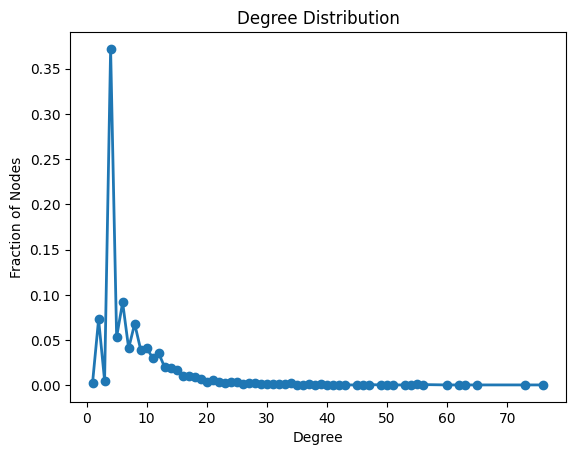

In [37]:
# Plot degree distribution
plt.plot(degree_values1, degree_histogram1, 'o-', linewidth=2)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.title('Degree Distribution')

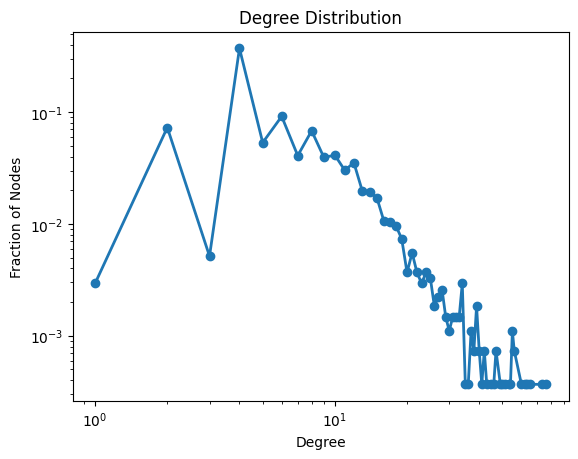

In [36]:
# Plot degree distribution
plt.loglog(degree_values1, degree_histogram1, 'o-', linewidth=2)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.title('Degree Distribution')
plt.show()

Calculating best minimal value for power law fit


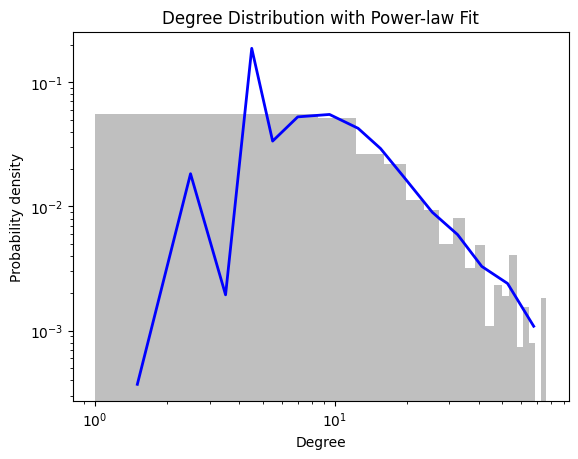

In [69]:
import powerlaw

# Extract degree values and their frequencies from the dictionary
degree_values = list(degree_dict1.values())
degree_frequencies = list(degree_dict1.values())

# Combine degree values and their frequencies into an array
data = []
for degree, frequency in zip(degree_values, degree_frequencies):
    data.extend([degree]*frequency)

# # Fit power-law distribution to the data
# fit = powerlaw.Fit(data, discrete=True, xmin=1)
fit = powerlaw.Fit(data, discrete=True)

# Plot the degree distribution and the fitted power-law distribution
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
powerlaw.plot_pdf(data, ax=ax, color='b', linewidth=2)
ax.hist(data, bins=20, density=True, color='gray', alpha=0.5)
ax.set_xlabel('Degree')
ax.set_ylabel('Probability density')
ax.set_title('Degree Distribution with Power-law Fit')
plt.show()

In [52]:
# Create Graph
G2 = nx.from_pandas_edgelist(df_edge2, source='source', target='target', edge_attr=['distance', 'type_num'], create_using=nx.DiGraph())
node_attrs2 = df_node2.set_index('node_id').to_dict('index')
nx.set_node_attributes(G2, node_attrs2)

# Get basic graph statistics
num_nodes2 = G2.number_of_nodes()
num_edges2 = G2.number_of_edges()

# Get degree distribution
degree_dict2 = dict(G2.degree(G2.nodes()))
degree_values2 = sorted(set(degree_dict2.values()))
degree_histogram2 = [list(degree_dict2.values()).count(i)/float(nx.number_of_nodes(G2)) for i in degree_values2]

# Get Density
density2 = nx.density(G2)

# Get average path length
sccs = nx.strongly_connected_components(G2)
num_nodes = G2.number_of_nodes()
total_pairs = num_nodes * (num_nodes - 2)
sum_path_lengths = 0

for scc in sccs:
    scc_subgraph = G2.subgraph(scc)
    scc_size = scc_subgraph.number_of_nodes()
    scc_pairs = scc_size * (scc_size - 2)
    scc_path_length = nx.average_shortest_path_length(scc_subgraph)
    sum_path_lengths += scc_pairs * scc_path_length

avg_path_length2 = sum_path_lengths / total_pairs

# Get network Diameter
diameter2 = 0
for scc in nx.strongly_connected_components(G2):
    scc_subgraph = G2.subgraph(scc)
    try:
        scc_diameter = nx.diameter(scc_subgraph)
        if scc_diameter > diameter2:
            diameter = diameter2
    except nx.NetworkXError:
        pass

print("Diameter of the graph:", diameter2)

# Get CC
cc2 = nx.average_clustering(G2)

print(f"Number of nodes: {num_nodes2}")
print(f"Number of edges: {num_edges2}")
print(f"Number of Density: {density2}")
print(f"Number of avg_path_length: {avg_path_length2}")
print(f"Number of diameter: {diameter2}")
print(f"Number of cc: {cc2}")


Diameter of the graph: 0
Number of nodes: 12237
Number of edges: 40533
Number of Density: 0.000270703780139563
Number of avg_path_length: 37.41881563283336
Number of diameter: 0
Number of cc: 0.13916844404059348


Text(0.5, 1.0, 'Degree Distribution')

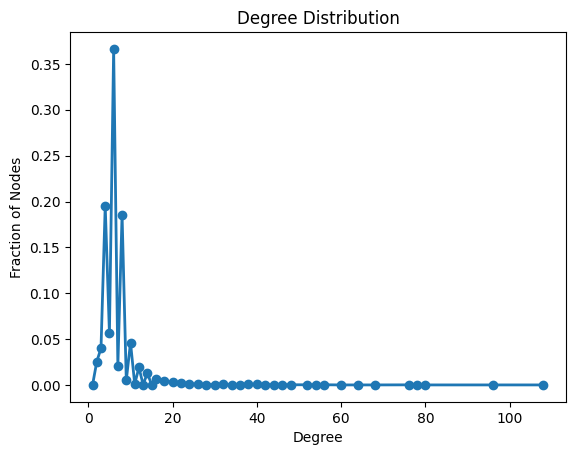

In [53]:
# Plot degree distribution (linear)
plt.plot(degree_values2, degree_histogram2, 'o-', linewidth=2)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.title('Degree Distribution')

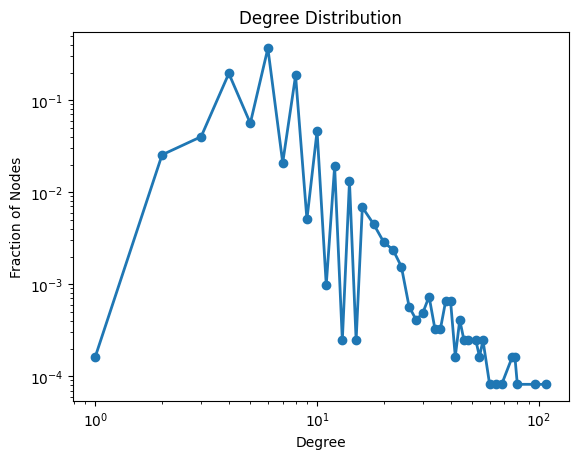

In [54]:
# Plot degree distribution (log-log)
plt.loglog(degree_values2, degree_histogram2, 'o-', linewidth=2)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes')
plt.title('Degree Distribution')
plt.show()

Calculating best minimal value for power law fit


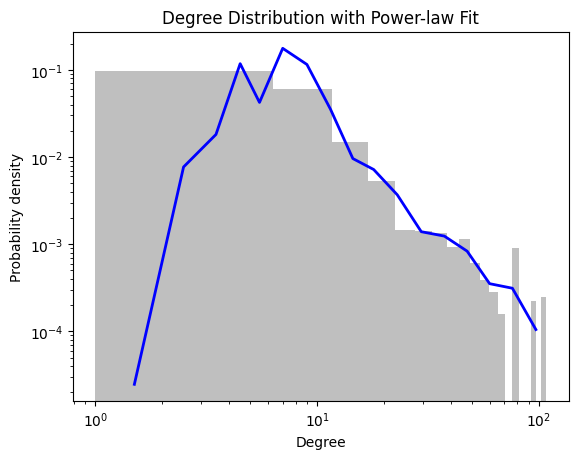

In [70]:
import powerlaw

# Extract degree values and their frequencies from the dictionary
degree_values = list(degree_dict2.values())
degree_frequencies = list(degree_dict2.values())

# Combine degree values and their frequencies into an array
data = []
for degree, frequency in zip(degree_values, degree_frequencies):
    data.extend([degree]*frequency)

# Fit power-law distribution to the data
# fit = powerlaw.Fit(data, discrete=True, xmin=1)
fit = powerlaw.Fit(data, discrete=True)

# Plot the degree distribution and the fitted power-law distribution
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
powerlaw.plot_pdf(data, ax=ax, color='b', linewidth=2)
ax.hist(data, bins=20, density=True, color='gray', alpha=0.5)
ax.set_xlabel('Degree')
ax.set_ylabel('Probability density')
ax.set_title('Degree Distribution with Power-law Fit')
plt.show()

# simple

In [60]:
# Create Graph
G1 = nx.from_pandas_edgelist(df_edge1, source='st_id', target='st_tg', edge_attr=['distance', 'train_max_speed', 'arr_time', 'dep_time', 'next_arr_time', 'stay_time', 'travel_time'], 
                             create_using=nx.DiGraph())
node_attrs1 = df_node1.set_index('node').to_dict('index')
nx.set_node_attributes(G1, node_attrs1)

# Get basic graph statistics
num_nodes1 = G1.number_of_nodes()
num_edges1 = G1.number_of_edges()

# Get degree distribution
degree_dict1 = dict(G1.degree(G1.nodes()))
degree_values1 = sorted(set(degree_dict1.values()))
degree_histogram1 = [list(degree_dict1.values()).count(i)/float(nx.number_of_nodes(G1)) for i in degree_values1]

# Get Density
density1 = nx.density(G1)

# Get CC
cc1 = nx.average_clustering(G1)

print(f"Number of nodes: {num_nodes1}")
print(f"Number of edges: {num_edges1}")
print(f"Number of Density: {density1}")
print(f"Number of cc: {cc1}")

Number of nodes: 2719
Number of edges: 10789
Number of Density: 0.0014598980655843206
Number of cc: 0.3776427564984455


In [61]:
# Create Graph
G2 = nx.from_pandas_edgelist(df_edge2, source='source', target='target', edge_attr=['distance', 'type_num'], create_using=nx.DiGraph())
node_attrs2 = df_node2.set_index('node_id').to_dict('index')
nx.set_node_attributes(G2, node_attrs2)

# Get basic graph statistics
num_nodes2 = G2.number_of_nodes()
num_edges2 = G2.number_of_edges()

# Get degree distribution
degree_dict2 = dict(G2.degree(G2.nodes()))
degree_values2 = sorted(set(degree_dict2.values()))
degree_histogram2 = [list(degree_dict2.values()).count(i)/float(nx.number_of_nodes(G2)) for i in degree_values2]

# Get Density
density2 = nx.density(G2)

# Get CC
cc2 = nx.average_clustering(G2)

print(f"Number of nodes: {num_nodes2}")
print(f"Number of edges: {num_edges2}")
print(f"Number of Density: {density2}")
print(f"Number of cc: {cc2}")

Number of nodes: 12237
Number of edges: 40533
Number of Density: 0.000270703780139563
Number of cc: 0.13916844404059348
